In [1]:
import requests  ## for getting data from a server
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame

## To tokenize and vectorize text type data
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
## For word clouds
## conda install -c conda-forge wordcloud
## May also have to run conda update --all on cmd
#import PIL
#import Pillow
#import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
#from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz

from sklearn.decomposition import LatentDirichletAllocation 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans

from sklearn import preprocessing

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

In [2]:
data1 = pd.read_csv('/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/Decision Trees/Text.csv')

In [3]:
TrainDF, TestDF = train_test_split(data1, test_size=0.3)

In [4]:
# Testing data
TestLabels = TestDF['LABEL']
print(TestLabels)

18        Indiscriminately from the Skies
21    Surface Waters and Underground Seas
30    Surface Waters and Underground Seas
20        Indiscriminately from the Skies
37                   Earth's Green Mantle
19    Surface Waters and Underground Seas
39                        Rivers of Death
26    Surface Waters and Underground Seas
38                     Realms of the Soil
14    Surface Waters and Underground Seas
34                     Realms of the Soil
16    Surface Waters and Underground Seas
17        Indiscriminately from the Skies
15        Indiscriminately from the Skies
1                         Rivers of Death
Name: LABEL, dtype: object


In [5]:
TestDF = TestDF.drop(['LABEL'], axis=1)
TestDF

,able,absorbed,absurdity,abundance,abundant,abundantly,accelerated,accident,accidentally,according,...,yard,year,years,yellow,yield,yolk,york,young,youngest,zone
18,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [6]:
# Train data
TrainLabels = TrainDF['LABEL']
print(TrainLabels)

11                   Earth's Green Mantle
32        Indiscriminately from the Skies
3                      Realms of the Soil
2                         Rivers of Death
35                     Realms of the Soil
46                        Rivers of Death
36                   Earth's Green Mantle
45                   Earth's Green Mantle
41                        Rivers of Death
47                     Realms of the Soil
31    Surface Waters and Underground Seas
29        Indiscriminately from the Skies
5                      Realms of the Soil
8                         Rivers of Death
27    Surface Waters and Underground Seas
22        Indiscriminately from the Skies
0                         Rivers of Death
12                        Rivers of Death
7                         Rivers of Death
23        Indiscriminately from the Skies
24    Surface Waters and Underground Seas
42                   Earth's Green Mantle
9                    Earth's Green Mantle
4                      Realms of t

In [7]:
TrainDF = TrainDF.drop('LABEL', axis=1)

In [8]:
from sklearn.ensemble import RandomForestClassifier
MyRF=RandomForestClassifier(n_estimators=100)

In [9]:
MyRF.fit(TrainDF, TrainLabels)

RandomForestClassifier()

In [28]:
estimator = MyRF.estimators_[0]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                class_names=list(data1['LABEL']), 
                feature_names=list(data1.columns)[1:],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

In [29]:
prediction = MyRF.predict(TestDF)

In [30]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(TestLabels, prediction)
print(conf_mat)

[[1 0 0 0 0]
 [1 2 0 1 0]
 [0 0 2 0 0]
 [0 0 0 2 0]
 [2 0 1 3 0]]


<AxesSubplot:>

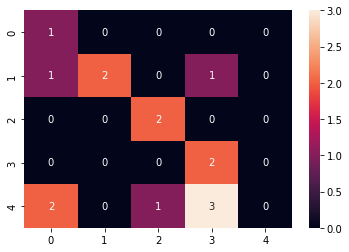

In [31]:
sns.heatmap(conf_mat, annot=True)